**IMPORTING PACKAGES**

**datetime - saves data in time and/or date format**

**seaborn - data visualization (ie heatmap)**

**time - convert time values to hour format (ie 10:50 (10 hr 50 min) converted to 10.833 hrs)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import plotly.plotly as py
import plotly.graph_objs as go
import datetime as dt
import time

**OPENING DATA FILE**


**Data obtained from https://perso.telecom-paristech.fr/eagan/class/igr204/datasets**

In [2]:
df = pd.read_csv('../Desktop/Data/TimeUse.csv')

#df.head()                                                 #1st 5 rows of table with header
display(HTML(df.to_html()))

,SEX,GEO/ACL00,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,Study,School and university except homework,Homework,Free time study,Household and family care,Food management except dish washing,Dish washing,Cleaning dwelling,Household upkeep except cleaning dwelling,Laundry,Ironing,Handicraft and producing textiles and other care for textiles,Gardening; other pet care,Tending domestic animals,Caring for pets,Walking the dog,Construction and repairs,Shopping and services,"Childcare, except teaching, reading and talking","Teaching, reading and talking with child",Household management and help family member,"Leisure, social and associative life",Organisational work,Informal help to other households,Participatory activities,Visiting and feasts,Other social life,Entertainment and culture,Resting,Walking and hiking,Sports and outdoor activities except walking and hiking,Computer games,Computing,Hobbies and games except computing and computer games,Reading books,"Reading, except books",TV and video,Radio and music,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Males,Belgium,24:00:00,10:45,8:15,1:49,0:42,3:07,3:05,0:02,0:11,0:05,0:03,0:03,2:28,0:22,0:10,0:08,0:18,0:01,0:01,0:00,0:19,0:00,0:03,0:05,0:19,0:24,0:05,0:04,0:08,5:58,0:07,0:00,0:03,0:32,0:23,0:10,0:27,0:12,0:15,0:05,0:22,0:13,0:06,0:22,2:35,0:05,0:01,1:30,0:25,0:02,0:16,0:03,0:00,0:15,0:30,0:01
1,Males,Bulgaria,24:00:00,11:54,9:08,2:07,0:39,3:32,3:27,0:04,0:03,0:02,0:01,0:00,2:37,0:15,0:05,0:06,0:22,0:01,0:00,0:00,0:36,0:32,0:01,0:02,0:16,0:13,0:02,0:05,0:01,4:46,0:00,0:09,0:01,0:04,0:37,0:01,0:10,0:16,0:10,0:00,0:01,0:11,0:06,0:15,2:41,0:06,0:01,1:07,0:23,0:00,0:12,0:01,0:06,0:21,0:03,0:02
2,Males,Germany (including former GDR from 1991),24:00:00,10:40,8:08,1:43,0:49,3:27,3:21,0:06,0:15,0:06,0:05,0:04,2:22,0:16,0:08,0:11,0:14,0:02,0:01,0:00,0:17,0:01,0:03,0:03,0:19,0:29,0:05,0:05,0:09,5:42,0:09,0:08,0:04,0:17,0:45,0:14,0:16,0:13,0:15,0:05,0:16,0:18,0:06,0:31,1:58,0:05,0:00,1:29,0:27,0:02,0:16,0:02,0:05,0:34,0:03,0:05
3,Males,Estonia,24:00:00,10:35,8:24,1:19,0:52,4:27,4:20,0:07,0:06,0:03,0:02,0:02,2:33,0:21,0:06,0:09,0:22,0:01,0:00,0:01,0:16,0:04,0:01,0:05,0:29,0:20,0:06,0:04,0:06,5:02,0:02,0:15,0:01,0:04,0:26,0:05,0:21,0:10,0:13,0:01,0:02,0:05,0:14,0:23,2:29,0:11,0:00,1:12,0:28,0:01,0:13,0:01,0:07,0:22,0:01,0:04
4,Males,Spain,24:00:00,11:11,8:36,1:47,0:48,4:21,4:17,0:03,0:18,0:06,0:07,0:04,1:37,0:19,0:04,0:07,0:06,0:01,0:00,0:00,0:09,0:03,0:01,0:03,0:06,0:19,0:07,0:04,0:06,5:16,0:01,0:07,0:03,0:12,0:45,0:07,0:24,0:39,0:14,0:02,0:09,0:10,0:04,0:13,2:00,0:05,0:00,1:16,0:31,0:02,0:07,0:02,0:03,0:28,0:02,0:02
5,Males,France,24:00:00,11:44,8:45,2:18,0:41,3:48,3:46,0:02,0:15,0:09,0:05,0:01,2:24,0:16,0:08,0:11,0:08,0:01,0:01,0:00,0:18,0:03,0:05,:,0:32,0:30,0:05,0:04,0:04,4:44,0:01,0:10,0:07,0:21,0:20,0:05,0:06,0:20,0:17,:,0:07,0:14,0:01,0:22,2:08,0:04,0:00,1:03,0:24,0:02,:,0:02,:,:,0:35,0:02
6,Males,Italy,24:00:00,11:16,8:17,1:57,1:02,4:15,4:11,0:04,0:11,0:04,0:06,0:01,1:35,0:11,0:05,0:09,0:06,0:00,0:00,0:00,0:16,0:01,0:01,0:02,0:06,0:22,0:04,0:07,0:04,5:05,0:02,0:07,0:04,0:17,0:42,0:06,0:32,0:23,0:15,0:02,0:07,0:12,0:04,0:17,1:52,0:04,0:00,1:35,0:32,0:02,0:12,0:02,0:03,0:36,0:08,0:03
7,Males,Latvia,24:00:00,10:46,8:35,1:33,0:37,5:00,4:55,0:06,0:09,0:05,0:02,0:02,1:50,0:16,0:04,0:06,0:21,0:01,0:00,0:00,0:17,0:03,0:01,0:03,0:17,0:12,0:02,0:02,0:06,4:45,0:00,0:11,0:01,0:20,0:14,0:05,0:23,0:12,0:19,0:02,0:03,0:05,0:09,0:17,2:18,0:06,0:00,1:28,0:37,0:02,0:12,0:01,0:07,0:26,0:02,0:02
8,Males,Lithuania,24:00:00,10:53,8:28,1:32,0:53,4

**USING BASIC FUNCTIONS TO GATHER DATA FROM SET**

In [3]:
df.describe()

,SEX,GEO/ACL00,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,...,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
count,28,28,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
unique,2,14,1,26,23,22,20,27,27,7,...,3,22,18,4,12,7,9,18,10,8
top,Males,Bulgaria,24:00:00,11:11,8:35,1:26,0:41,3:48,3:46,0:03,...,0:00,1:30,0:18,0:02,0:14,0:03,0:03,0:36,0:01,0:02
freq,14,2,28,2,3,4,3,2,2,7,...,23,2,3,16,5,8,8,3,9,9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 58 columns):
SEX                                                                                28 non-null object
GEO/ACL00                                                                          28 non-null object
Total                                                                              28 non-null object
Personal care                                                                      28 non-null object
Sleep                                                                              28 non-null object
Eating                                                                             28 non-null object
Other and/or unspecified personal care                                             28 non-null object
Employment, related activities and travel as part of/during main and second job    28 non-null object
Main and second job and related travel                                           

In [5]:
print (df.isnull().sum())

SEX                                                                                0
GEO/ACL00                                                                          0
Total                                                                              0
Personal care                                                                      0
Sleep                                                                              0
Eating                                                                             0
Other and/or unspecified personal care                                             0
Employment, related activities and travel as part of/during main and second job    0
Main and second job and related travel                                             0
Activities related to employment and unspecified employment                        0
Study                                                                              0
School and university except homework                            

In [6]:
print(df.dtypes)                                        

SEX                                                                                object
GEO/ACL00                                                                          object
Total                                                                              object
Personal care                                                                      object
Sleep                                                                              object
Eating                                                                             object
Other and/or unspecified personal care                                             object
Employment, related activities and travel as part of/during main and second job    object
Main and second job and related travel                                             object
Activities related to employment and unspecified employment                        object
Study                                                                              object
School and

In [7]:
df.columns

Index([u'SEX', u'GEO/ACL00', u'Total', u'Personal care', u'Sleep', u'Eating',
       u'Other and/or unspecified personal care',
       u'Employment, related activities and travel as part of/during main and second job',
       u'Main and second job and related travel',
       u'Activities related to employment and unspecified employment',
       u'Study', u'School and university except homework', u'Homework',
       u'Free time study', u'Household and family care',
       u'Food management except dish washing', u'Dish washing',
       u'Cleaning dwelling', u'Household upkeep except cleaning dwelling',
       u'Laundry', u'Ironing',
       u'Handicraft and producing textiles and other care for textiles',
       u'Gardening; other pet care', u'Tending domestic animals',
       u'Caring for pets', u'Walking the dog', u'Construction and repairs ',
       u'Shopping and services',
       u'Childcare, except teaching, reading and talking',
       u'Teaching, reading and talking with child',
 

**CLEANING DATA TO BE A READABLE FORMAT**

**(1) TIME: Converting data presented in table (HH:MM) to float value for analysis**

**Method of conversion: (HH:MM) --> add seconds column (HH:MM:SS) --> convert to decimal format in hours**

**(2) COLUMN NAMES: Combining column names with same name (ie multiple 'Travel')

**Method: reducing column name to first word, can do count_values to find if column name is used more than once

In [8]:
#(1) CONVERT DATA TIMES TO DECIMAL VALUES

for i in df.columns:
    if i=='SEX' or i=='GEO/ACL00' or i=='Total':                   #1st 3 columns leave as category type
        df[i]=df[i].str.strip().astype('category')                 #outputs not integars
    else:
        for j in range(len(df[i])):                                #sets empty cells to 00:00 (HH:MM)
            if df.iloc[j][i]==':':
                df.set_value(j,i,"00:00")                             
        df[i]=df[i].astype(str)+':00'                              #for all cells, convert values to str and append ':00' for (SS) 

    
        df[i]=pd.to_timedelta(df[i],'s')                           #read values as HH:MM:SS    
        df[i]=df[i].dt.seconds/3600.0                              #divide time by number of sec to get decimal in hours
        df[i]=df[i].round(2)                                       #round values to 2 sig figs after decimal
        #print(df[i])
            

display(HTML(df.to_html()))
df.dtypes                                                          #ensure that all columns except 1st 3 are float

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



,SEX,GEO/ACL00,Total,Personal care,Sleep,Eating,Other and/or unspecified personal care,"Employment, related activities and travel as part of/during main and second job",Main and second job and related travel,Activities related to employment and unspecified employment,Study,School and university except homework,Homework,Free time study,Household and family care,Food management except dish washing,Dish washing,Cleaning dwelling,Household upkeep except cleaning dwelling,Laundry,Ironing,Handicraft and producing textiles and other care for textiles,Gardening; other pet care,Tending domestic animals,Caring for pets,Walking the dog,Construction and repairs,Shopping and services,"Childcare, except teaching, reading and talking","Teaching, reading and talking with child",Household management and help family member,"Leisure, social and associative life",Organisational work,Informal help to other households,Participatory activities,Visiting and feasts,Other social life,Entertainment and culture,Resting,Walking and hiking,Sports and outdoor activities except walking and hiking,Computer games,Computing,Hobbies and games except computing and computer games,Reading books,"Reading, except books",TV and video,Radio and music,Unspecified leisure,Travel except travel related to jobs,Travel to/from work,Travel related to study,Travel related to shopping and services,Transporting a child,Travel related to other household purposes,"Travel related to leisure, social and associative life",Unspecified travel,Unspecified time use
0,Males,Belgium,24:00:00,10.75,8.25,1.82,0.70,3.12,3.08,0.03,0.18,0.08,0.05,0.05,2.47,0.37,0.17,0.13,0.30,0.02,0.02,0.00,0.32,0.00,0.05,0.08,0.32,0.40,0.08,0.07,0.13,5.97,0.12,0.00,0.05,0.53,0.38,0.17,0.45,0.20,0.25,0.08,0.37,0.22,0.10,0.37,2.58,0.08,0.02,1.50,0.42,0.03,0.27,0.05,0.00,0.25,0.50,0.02
1,Males,Bulgaria,24:00:00,11.90,9.13,2.12,0.65,3.53,3.45,0.07,0.05,0.03,0.02,0.00,2.62,0.25,0.08,0.10,0.37,0.02,0.00,0.00,0.60,0.53,0.02,0.03,0.27,0.22,0.03,0.08,0.02,4.77,0.00,0.15,0.02,0.07,0.62,0.02,0.17,0.27,0.17,0.00,0.02,0.18,0.10,0.25,2.68,0.10,0.02,1.12,0.38,0.00,0.20,0.02,0.10,0.35,0.05,0.03
2,Males,Germany (including former GDR from 1991),24:00:00,10.67,8.13,1.72,0.82,3.45,3.35,0.10,0.25,0.10,0.08,0.07,2.37,0.27,0.13,0.18,0.23,0.03,0.02,0.00,0.28,0.02,0.05,0.05,0.32,0.48,0.08,0.08,0.15,5.70,0.15,0.13,0.07,0.28,0.75,0.23,0.27,0.22,0.25,0.08,0.27,0.30,0.10,0.52,1.97,0.08,0.00,1.48,0.45,0.03,0.27,0.03,0.08,0.57,0.05,0.08
3,Males,Estonia,24:00:00,10.58,8.40,1.32,0.87,4.45,4.33,0.12,0.10,0.05,0.03,0.03,2.55,0.35,0.10,0.15,0.37,0.02,0.00,0.02,0.27,0.07,0.02,0.08,0.48,0.33,0.10,0.07,0.10,5.03,0.03,0.25,0.02,0.07,0.43,0.08,0.35,0.17,0.22,0.02,0.03,0.08,0.23,0.38,2.48,0.18,0.00,1.20,0.47,0.02,0.22,0.02,0.12,0.37,0.02,0.07
4,Males,Spain,24:00:00,11.18,8.60,1.78,0.80,4.35,4.28,0.05,0.30,0.10,0.12,0.07,1.62,0.32,0.07,0.12,0.10,0.02,0.00,0.00,0.15,0.05,0.02,0.05,0.10,0.32,0.12,0.07,0.10,5.27,0.02,0.12,0.05,0.20,0.75,0.12,0.40,0.65,0.23,0.03,0.15,0.17,0.07,0.22,2.00,0.08,0.00,1.27,0.52,0.03,0.12,0.03,0.05,0.47,0.03,0.03
5,Males,France,24:00:00,11.73,8.75,2.30,0.68,3.80,3.77,0.03,0.25,0.15,0.08,0.02,2.40,0.27,0.13,0.18,0.13,0.02,0.02,0.00,0.30,0.05,0.08,0.00,0.53,0.50,0.08,0.07,0.07,4.73,0.02,0.17,0.12,0.35,0.33,0.08,0.10,0.33,0.28,0.00,0.12,0.23,0.02,0.37,2.13,0.07,0.00,1.05,0.40,0.03,0.00,0.03,0.00,0.00,0.58,0.03
6,Males,Italy,24:00:00,11.27,8.28,1.95,1.03,4.25,4.18,0.07,0.18,0.07,0.10,0.02,1.58,0.18,0.08,0.15,0.10,0.00,0.00,0.00,0.27,0.02,0.02,0.03,0.10,0.37,0.07,0.12,0.07,5.08,0.03,0.12,0.07,0.28,0.70,0.10,0.53,0.38,0.25,0.03,0.12,0.20,0.07,0.28,1.87,0.07,0.00,1.58,0.53,0.03,0.20,0.03,0.05,0.60,0.13,0.05
7,Males,Latvia,24:00:00,10.77,8.58,1.55,0.62,5.00,4.92,0.10,0.15,0.08,0.03,0.03,1.83,0.27,0.07,0.10,0.35,0.02,0.00,0.00,0.28,0.05,0.02,0.05,0.28,0.20,0.03,0.03,0.10,4.75,0.00,0.18,0.02,0.33,0.23,0.08,0.38,0.20,0.32,0.03,0.05,0.08,0.15,0.28,2.30,0.10,0.00,1.47,0.62,0.03,0.20,0.02,0.12,0.43,0.03,0.03
8,Males,Lithuania,24:00:00,10.88,8

SEX                                                                                category
GEO/ACL00                                                                          category
Total                                                                              category
Personal care                                                                       float64
Sleep                                                                               float64
Eating                                                                              float64
Other and/or unspecified personal care                                              float64
Employment, related activities and travel as part of/during main and second job     float64
Main and second job and related travel                                              float64
Activities related to employment and unspecified employment                         float64
Study                                                                           

In [9]:
#(2) COLUMN NAMES

new_columns=[]
for i in range(len(df.columns)):                           #split column name to only 1st word; remove "," or ";" at end of words if present
    new_columns.append(df.columns[:][i].split(' ')[0].strip(',').strip(';'))

df.columns = new_columns
df['Travel_sum']=df.Travel.sum(axis=1)                     #combine "Travel", "Unspecified", and "Reading" since multiple found
df=df.drop(['Travel'], axis=1)
df['Unspecified_sum']=df.Unspecified.sum(axis=1)
df=df.drop(['Unspecified'], axis=1)
df['Reading_sum']=df.Reading.sum(axis=1)
df=df.drop(['Reading'], axis=1)
df.head()


,SEX,GEO/ACL00,Total,Personal,Sleep,Eating,Other,Employment,Main,Activities,...,Sports,Computer,Computing,Hobbies,TV,Radio,Transporting,Travel_sum,Unspecified_sum,Reading_sum
0,Males,Belgium,24:00:00,10.75,8.25,1.82,0.70,3.12,3.08,0.03,...,0.25,0.08,0.37,0.22,2.58,0.08,0.05,2.47,0.54,0.47
1,Males,Bulgaria,24:00:00,11.90,9.13,2.12,0.65,3.53,3.45,0.07,...,0.17,0.00,0.02,0.18,2.68,0.10,0.02,2.15,0.10,0.35
2,Males,Germany (including former GDR from 1991),24:00:00,10.67,8.13,1.72,0.82,3.45,3.35,0.10,...,0.25,0.08,0.27,0.30,1.97,0.08,0.03,2.88,0.13,0.62
3,Males,Estonia,24:00:00,10.58,8.40,1.32,0.87,4.45,4.33,0.12,...,0.22,0.02,0.03,0.08,2.48,0.18,0.02,2.40,0.09,0.61
4,Males,Spain,24:00:00,11.18,8.60,1.78,0.80,4.35,4.28,0.05,...,0.23,0.03,0.15,0.17,2.00,0.08,0.03,2.46,0.06,0.29


In [10]:
#GROUPING BY COUNTRY NAME

group1 = df.groupby(["GEO/ACL00"]).agg(np.mean)
print group1.index
'''for key,item in group1:
    display(HTML(group1.get_group(key).to_html()))'''

CategoricalIndex([u'Belgium', u'Bulgaria', u'Estonia', u'Finland', u'France',
                  u'Germany (including  former GDR from 1991)', u'Italy',
                  u'Latvia', u'Lithuania', u'Norway', u'Poland', u'Slovenia',
                  u'Spain', u'United Kingdom'],
                 categories=[u'Belgium', u'Bulgaria', u'Estonia', u'Finland', u'France', u'Germany (including  former GDR from 1991)', u'Italy', u'Latvia', ...], ordered=False, name=u'GEO/ACL00', dtype='category')


'for key,item in group1:\n    display(HTML(group1.get_group(key).to_html()))'

**DATA VISUALIZATION**

**Plotting and exploring pie charts**

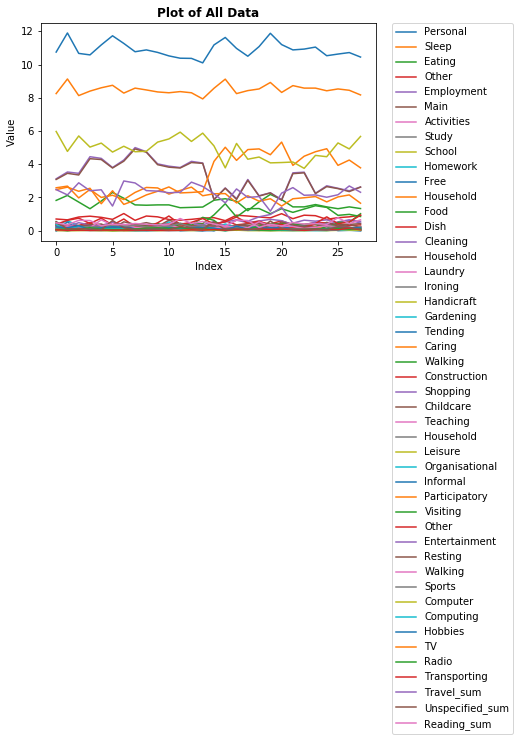

In [11]:
df.plot()
plt.title('Plot of All Data', fontweight='bold')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    #place legend box to right of plot
plt.show()

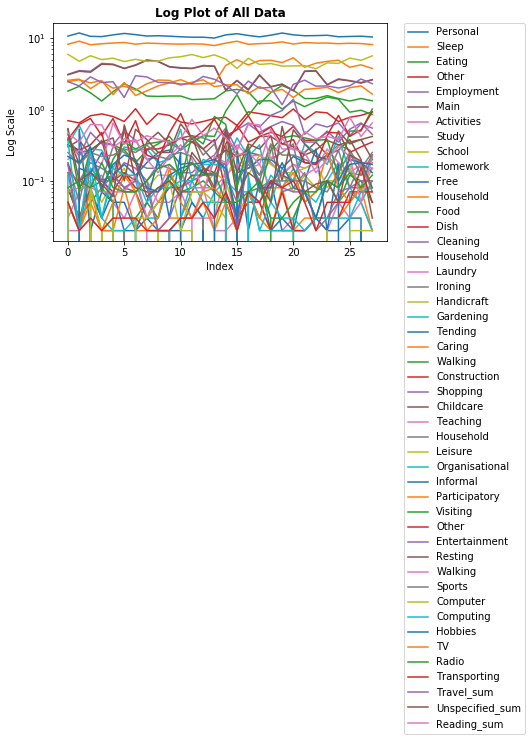

In [12]:
df.plot()
plt.yscale('log')                                                 # makes plot log scale 


plt.title('Log Plot of All Data', fontweight='bold')              # figure features
plt.xlabel('Index')
plt.ylabel('Log Scale')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) 
plt.show()

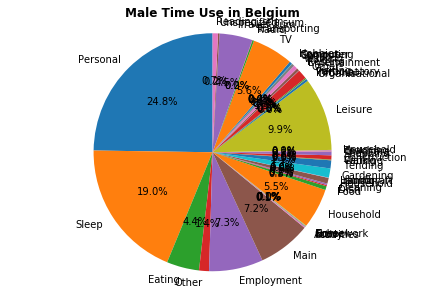

In [13]:
#SINGLE PIE CHART

plt.pie(
    df.iloc[1,3:],
    labels=df.columns[3:],
    shadow=False,
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )
# View the plot drop above
plt.axis('equal')

# View the plot
plt.tight_layout()
plt.title('Male Time Use in Belgium', fontweight='bold')
plt.show()

In [ ]:
#WORKING CODE FOR PLOTTING ALL COUNTRY DATA; BULKY RESULT

for i in range(len(group1)):    
    plt.figure(figsize=(10,7))
    plt.pie(group1.iloc[i,3:],
        labels= group1.columns[3:],
        #autopct='%1.1f%%',
        rotatelabels=True)
    a='Time Use in '+ group1.index[i]
    plt.title(a, fontweight = 'bold')
       
    # View the plot        
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [ ]:
#for i in range(len(group1)): 

for i in range(1,15):    
    plt.figure(figsize=(20,14))
    plt.subplot(2, 7, i)
    plt.pie(group1.iloc[i-1,3:],
        labels= group1.columns[3:],
        #autopct='%1.1f%%',
        rotatelabels=True)
    a='Time Use in '+ group1.index[i-1]
    plt.title(a, fontweight = 'bold')
       
    # View the plot        
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [ ]:
for i in range(1,15):    
    fig = plt.figure()
    fig.add_subplot(2, 7, i)
    plt.pie(group1.iloc[i-1,3:],
        labels= group1.columns[3:],
        #autopct='%1.1f%%',
        rotatelabels=True)
    a='Time Use in '+ group1.index[i-1]
    plt.title(a, fontweight = 'bold')
       
    # View the plot        
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [14]:
#for i in range(1,15):    
    
def mini_plots(group1):   
    fig = plt.figure()
    ax1 = fig1.add_subplot(7,2,1)
    ax2 = fig1.add_subplot(722)
    ax3 = fig1.add_subplot(723)
    ax4 = fig1.add_subplot(724)
    ax5 = fig1.add_subplot(725)
    ax6 = fig1.add_subplot(726)
    ax7 = fig1.add_subplot(727)
    ax8 = fig1.add_subplot(728)
    ax9 = fig1.add_subplot(729)
    ax10 = fig1.add_subplot(7,2,10)
    ax11 = fig1.add_subplot(7,2,11)
    ax12 = fig1.add_subplot(7212)
    ax13 = fig1.add_subplot(7213)
    ax14 = fig1.add_subplot(7214)

    
    
    key_list = group1.iloc[i-1,3:]
    ax1.imshow(im_dict(key_list[0]))
    ax1.set_xlabel(group1.columns[3:])

    plt.show()
    
    """
    plt.pie(group1.iloc[i-1,3:],
        labels= group1.columns[3:],
        #autopct='%1.1f%%',
        rotatelabels=True)
    a='Time Use in '+ group1.index[i-1]
    plt.title(a, fontweight = 'bold')
       
    # View the plot        
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    """

In [ ]:
#MULTIPLE PIE CHARTS; COMPARING ALL COUNTRIES

fig, axes = plt.subplots(14,1)   #labels=group1.columns[3:],
i
for ax in axes:
    if i==len(group1):
        break
    ax.pie(group1.iloc[i,3:])
    ax.set(ylabel='', aspect='equal')
    a='Time Use in '+ group1.index[i]
    ax.set_title(a, fontweight = 'bold')
                 
    i+=1
   # View the plot drop above
plt.axis('equal')
    
    # View the plot
plt.tight_layout()    
    

axes[0].legend(bbox_to_anchor=(0, 0.5))
plt.show()



In [ ]:
#heatmap
f,ax = plt.subplots(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.show()

Issues:
-column name including "/" because wasn't able to group_by_country; had difficulty renaming
-

In [ ]:
print (df)

In [ ]:
type(df)

In [ ]:
dict = pd.DataFrame({'Personal care':[1,2,3],
                   'spirit':[4,5,6],
                   'wine':[7,8,9]}, index=['Africa','Asia','Europe'])
print df.columns[3:]

In [ ]:
row['Personal care'].values.tolist()

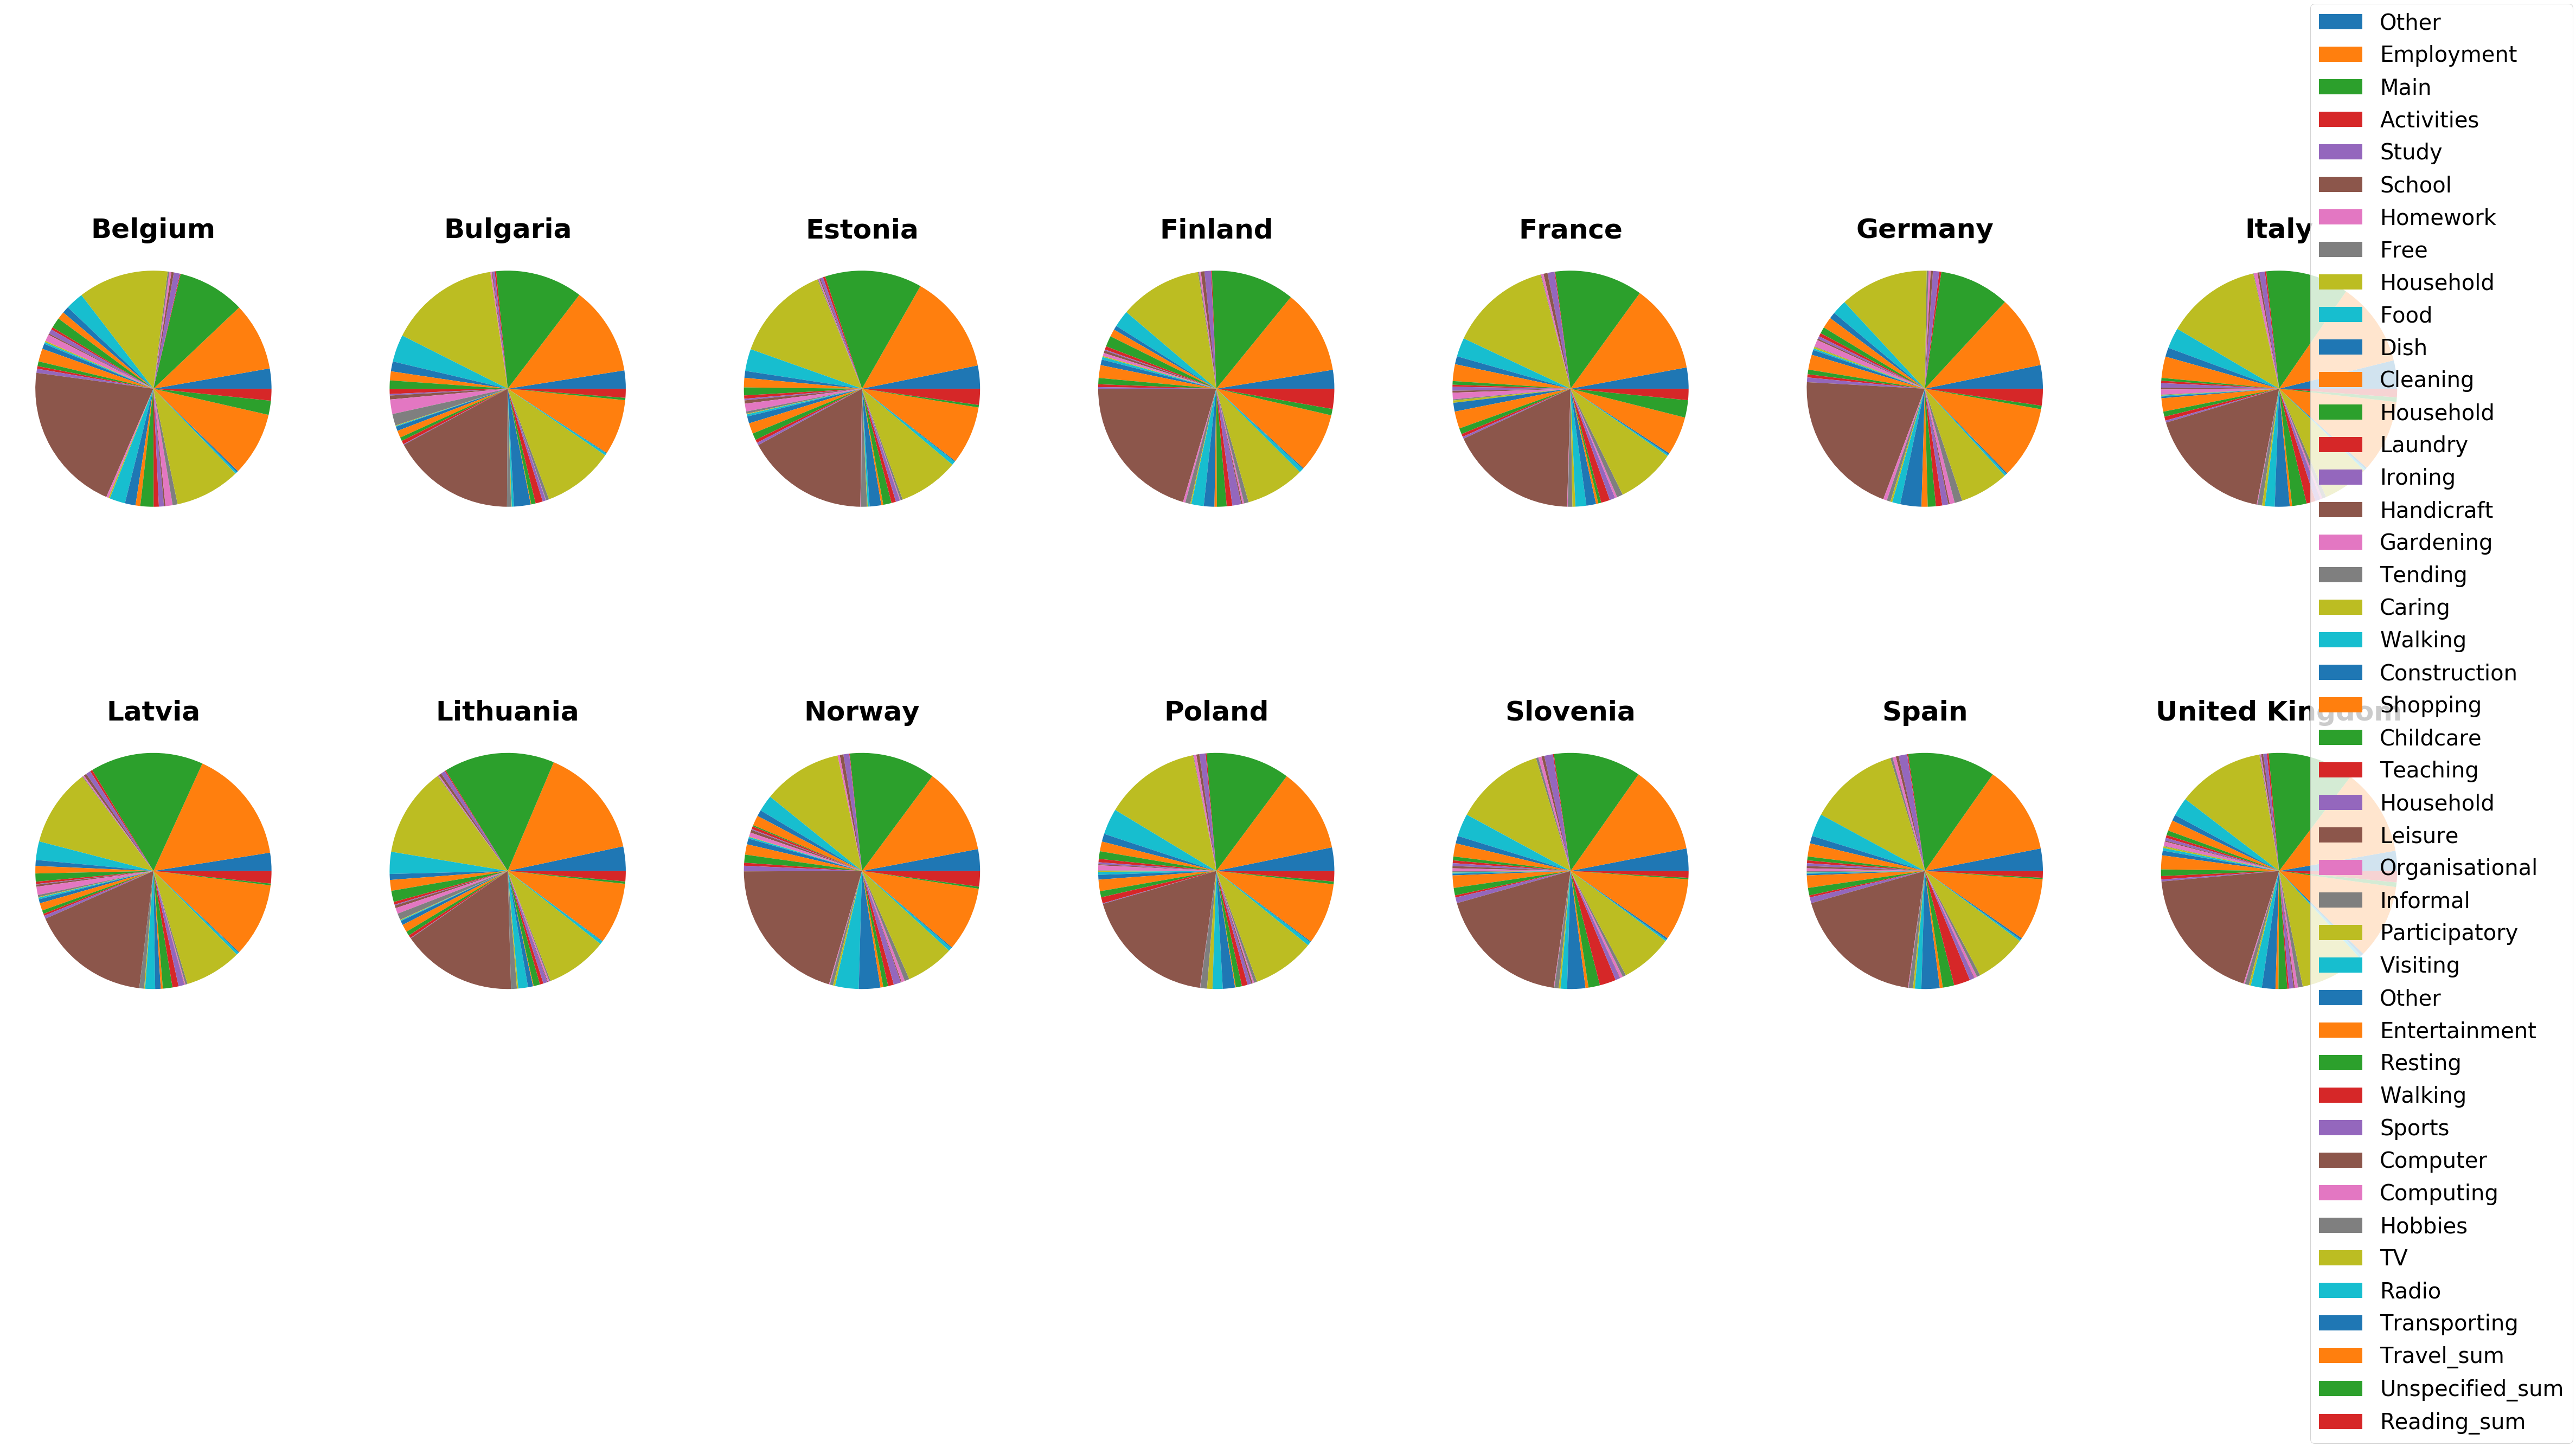

In [75]:
"""
for m in group1.itervalues():
    for i in range(len(group1)):
        data_i = group1.iloc[i-1,3:]
        
"""

data1 = group1.iloc[0,3:]
data2 = group1.iloc[1,3:]
data3 = group1.iloc[2,3:]
data4 = group1.iloc[3,3:]
data5 = group1.iloc[4,3:]
data6 = group1.iloc[5,3:]
data7 = group1.iloc[6,3:]
data8 = group1.iloc[7,3:]
data9 = group1.iloc[8,3:]
data10 = group1.iloc[9,3:]
data11 = group1.iloc[10,3:]
data12 = group1.iloc[12,3:]
data13 = group1.iloc[12,3:]
data14 = group1.iloc[13,3:]



# create a figure with two subplots
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7) , (ax8, ax9, ax10, ax11, ax12, ax13, ax14)) = plt.subplots(2, 7, figsize = (80,30), subplot_kw={'aspect':'equal'})
#fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7, 2, figsize = (50,30), subplot_kw={'aspect':'equal'})


# plot each pie chart in a separate subplot 
ax1.pie(data1)
ax2.pie(data2)
ax3.pie(data3)
ax4.pie(data4)
ax5.pie(data5)
ax6.pie(data6)
ax7.pie(data7)
ax8.pie(data8)
ax9.pie(data9)
ax10.pie(data10)
ax11.pie(data11)
ax12.pie(data12)
ax13.pie(data13)
ax14.pie(data14)


#for i in range(len(group1)):
#    a='Time Use in '+ group1.index[i]
ax1.set_title('Belgium', fontweight = 'bold', fontsize=50)
ax2.set_title('Bulgaria', fontweight = 'bold', fontsize=50)
ax3.set_title('Estonia', fontweight = 'bold', fontsize=50)
ax4.set_title('Finland', fontweight = 'bold', fontsize=50)
ax5.set_title('France', fontweight = 'bold', fontsize=50)
ax6.set_title('Germany', fontweight = 'bold', fontsize=50)
ax7.set_title('Italy', fontweight = 'bold', fontsize=50)
ax8.set_title('Latvia', fontweight = 'bold', fontsize=50)
ax9.set_title('Lithuania', fontweight = 'bold', fontsize=50)
ax10.set_title('Norway', fontweight = 'bold', fontsize=50)
ax11.set_title('Poland', fontweight = 'bold', fontsize=50)
ax12.set_title('Slovenia', fontweight = 'bold', fontsize=50)
ax13.set_title('Spain', fontweight = 'bold', fontsize=50)
ax14.set_title('United Kingdom', fontweight = 'bold', fontsize=50)

   
plt.legend(bbox_to_anchor=(1.05, 1), loc='center', borderaxespad=0.5, prop={'size':40},labels= group1.columns[3:]) 


#plt.tight_layout()
plt.show()